# Imports

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from odds_optimized import DyCF, LevelsetPlotter

# Parameters

In [2]:
d = 2  # Data dimension
n = 8  # Degree of the polynomial basis
N = 1000  # Number of samples

# Data

In [3]:
np.random.seed(42)

N = 2 * (N//2)  # Ensure N is even for two normal distributions

# Generate the "T" rotated data
norm_1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 50]], size=N//2)
norm_1 = np.dot(norm_1, np.array([[np.cos(np.pi / 4), -np.sin(np.pi / 4)], [np.sin(np.pi / 4), np.cos(np.pi / 4)]])) + np.array([[20, 20]])
norm_2 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 50]], size=N//2)
norm_2 = np.dot(norm_2, np.array([[-np.cos(np.pi / 4), -np.sin(np.pi / 4)], [np.sin(np.pi / 4), -np.cos(np.pi / 4)]]))
data = np.concatenate([norm_1, norm_2])

# Scale the data for better performance of DyCF
scaler = MinMaxScaler((-1, 1))
data = scaler.fit_transform(data)

# Without regularization for DyCF
Show the **Christoffel function** level sets

## Fit the Christoffel function

In [4]:
dycf = DyCF(n, regularization=None)
dycf.fit(data)

## Plot the level set

In [5]:
plotter = LevelsetPlotter(dycf)

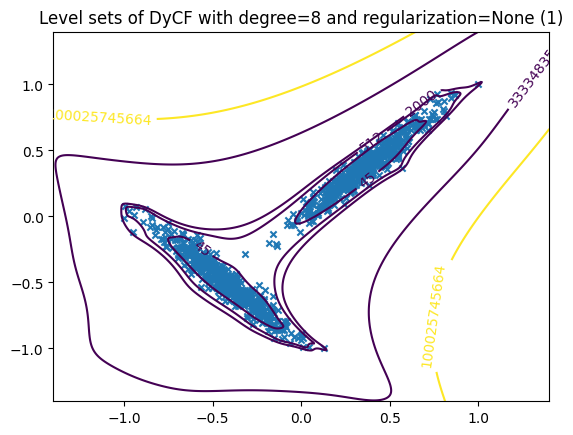

In [6]:
plotter.plot(data, n_x1=500, n_x2=500, levels=[45, 512, 2000], percentiles=[50, 75])
# n_x1 and n_x2 control the resolution of the grid for plotting
# You can adjust the levels and percentiles as needed
# More information can be found in the odds_optimized.plotter.LevelsetPlotter.plot documentation

## Plot the boundary decision
Only outliers because the regularization is not set.

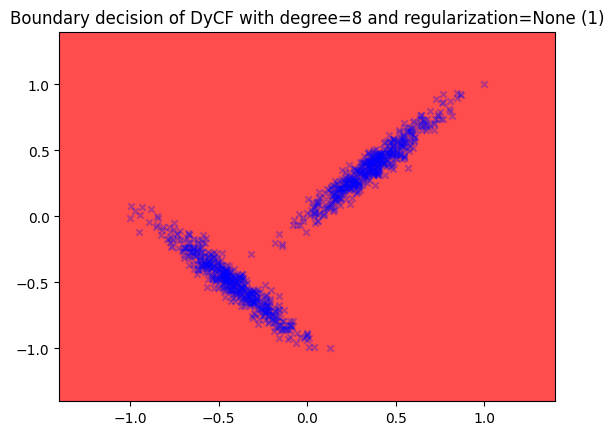

In [7]:
plotter.boundary(data, n_x1=500, n_x2=500)

# Using "comb" regularization for DyCF
**"comb"** regularization means that the **level set of DyCF at 1** is equivalent to the level set of the **Christoffel function at $\begin{pmatrix}n+d \\ d\end{pmatrix}$**, where **d** is the number of **features** and **n** is the **degree** of the polynomial.

## Fit the Christoffel function

In [8]:
dycf_comb = DyCF(n, regularization="comb")
dycf_comb.fit(data)

## Plot the level set

In [9]:
plotter_comb = LevelsetPlotter(dycf_comb)

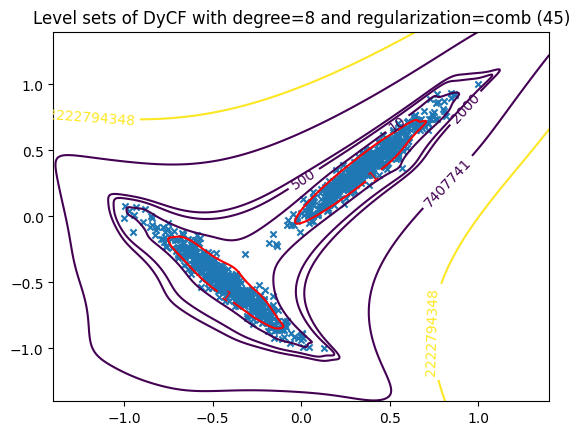

In [10]:
plotter_comb.plot(data, n_x1=500, n_x2=500, levels=[10, 500, 2000], percentiles=[50, 75])
# n_x1 and n_x2 control the resolution of the grid for plotting
# You can adjust the levels and percentiles as needed
# More information can be found in the odds_optimized.plotter.LevelsetPlotter.plot documentation

## Plot the boundary decision

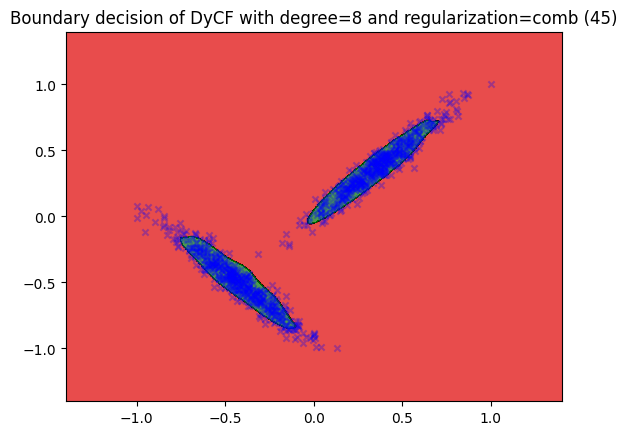

In [11]:
plotter_comb.boundary(data, n_x1=500, n_x2=500)

# Using "vu_C" regularization for DyCF
**"vu_C"** regularization means that the **level set of DyCF at 1** is equivalent to the level set of the **Christoffel function at** $\mathbf{\frac{n^{3d/2}}{C}}$, where **d** is the number of **features** and **n** is the **degree** of the polynomial.

## Fit the Christoffel function

In [12]:
dycf_vu_C = DyCF(n, regularization="vu_C", C=1)
dycf_vu_C.fit(data)

## Plot the level set

In [13]:
plotter_vu_C = LevelsetPlotter(dycf_vu_C)

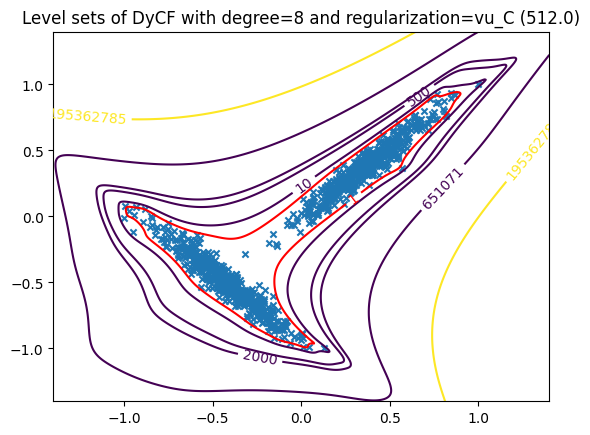

In [14]:
plotter_vu_C.plot(data, n_x1=500, n_x2=500, levels=[10, 500, 2000], percentiles=[50, 75])
# n_x1 and n_x2 control the resolution of the grid for plotting
# You can adjust the levels and percentiles as needed
# More information can be found in the odds_optimized.plotter.LevelsetPlotter.plot documentation

## Plot the boundary decision

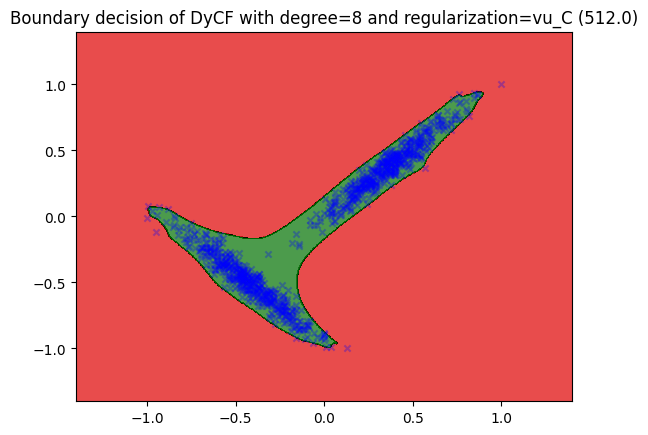

In [15]:
plotter_vu_C.boundary(data, n_x1=500, n_x2=500)